In [68]:
import pandas as pd

In [423]:
folder = "/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/EqulibratedSystem/"
def genFiles(system1,n1,system2="",n2=0,useN2=True):
    for index in range(1,n1+1):
        yield system1+"_%d_Vcorr_smooth.pspect"%(index)
    if useN2:
        for index in range(1,n2+1):
            yield system2+"_%d_Vcorr_smooth.pspect"%(index)
        

def getZVal(n,initial = 0):
    for index in range(0,n):
        yield initial + index * 3
def getDataFrame(folder,list_names,freqThreshold = 300):
    for file in list_names:
        df1=pd.read_csv(folder+file,delimiter='\t',names=["f","I","smooth"])
        df1.I = df1.I/sum(df1.I)
        df1.smooth = df1.smooth/sum(df1.smooth)
        df1.fillna(0, inplace = True)
        df1 = df1[df1.f<freqThreshold]
        yield df1
        
def getHeatMap(dfList):
    columns = len(dfList)
    rows = len(dfList[0].iloc[:,0])
    
    from numpy import zeros
    heatMapMat = zeros(rows*columns).reshape(rows,columns)
    positionMat = [(x,y) for x in range(rows) for y in range(columns)]
    for matPos in positionMat:
        heatMapMat[matPos[0],matPos[1]] = dfList[matPos[1]].smooth[matPos[0]]
    return heatMapMat
    
    

In [199]:
def HeatMapMatrix(folder,system1,n1,system2="",n2=0,initial=0,UseN2=True, freqThreshold=300):
    fileList=list(genFiles(system1,n1,system2,n2,UseN2))
    zVal=list(getZVal(n1+n2, initial))
    dfList = list(getDataFrame(folder,fileList, freqThreshold))
    mat = getHeatMap(dfList)
    return mat
    

def heatMap(mat,n1,n2=0,initial=0,freqThreshold=300,fileout="heatMap.jpg",subplot = 0):
    import numpy as np
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import matplotlib.cbook as cbook
    from matplotlib.path import Path
    from matplotlib.patches import PathPatch
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    zVal=list(getZVal(n1+n2, initial))
    deltax = int(900/len(zVal))
    deltay = int(freqThreshold/20)
    im = ax.imshow(mat,interpolation='bilinear',extent=[0, 900, 0, 1000],
               vmax=mat.max(), vmin=mat.min())
    

    plt.xticks(range(0,900,deltax),zVal)
    plt.yticks(range(0,1000,50),range(freqThreshold,0,-deltay))
    #plt.grid()
    colorbar_ax=fig.add_axes([1,0.1,0.05,0.8])
    fig.colorbar(im,cax=colorbar_ax)
    plt.savefig(fileout)
    plt.show()
    

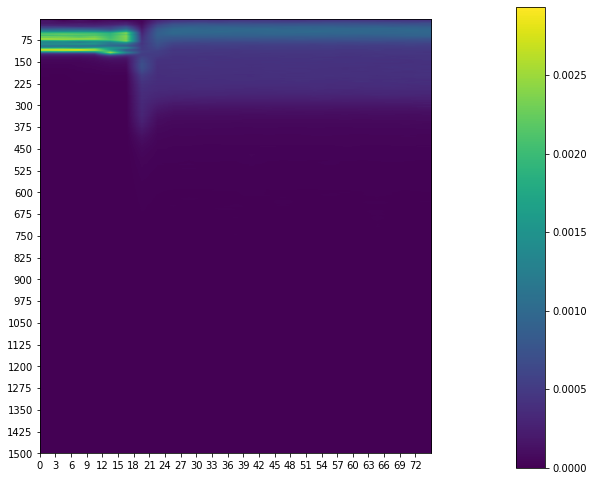

In [200]:
useN2 = True
subsystem = "MNWN"

fileOut = folder + "%s.jpg"%(subsystem)
system2 = "%s_Dynamics_TimeAdjusted_CM_Atomic"%(subsystem)
system1 = "%s_Dynamics_TimeAdjusted_Au_Atomic"%(subsystem)
n1=6
n2=19
freqThreshold = 1500
initial = 0
if not useN2:
    n2 = 0

import matplotlib.pyplot as plt
mat1 = HeatMapMatrix(folder,system1,n1,system2,n2,initial,useN2,freqThreshold)
heatMap(mat1,n1,n2,initial,freqThreshold,fileOut)


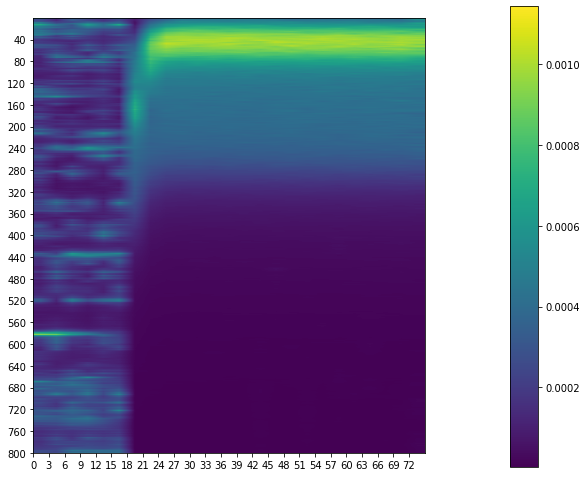

In [186]:
useN2 = True
subsystem = "MFWN"

fileOut = folder + "%s.jpg"%(subsystem)
system2 = "%s_Dynamics_TimeAdjusted_CM_Atomic"%(subsystem)
system1 = "%s_Dynamics_TimeAdjusted_Au_Atomic"%(subsystem)
n1=6
n2=19
freqThreshold = 800
initial = 0
if not useN2:
    n2 = 0

import matplotlib.pyplot as plt
mat2 = HeatMapMatrix(folder,system1,n1,system2,n2,initial,useN2,freqThreshold)
heatMap(mat2,n1,n2,initial,freqThreshold,fileOut)

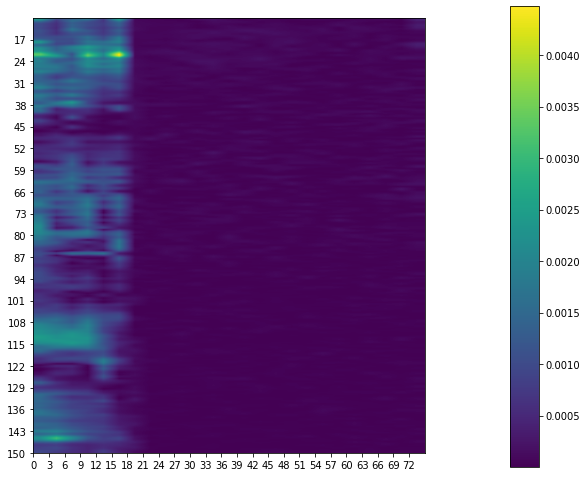

In [162]:
mat_diff = abs(mat1-mat2)
fileOut = folder + "WF_Difference.jpg"
heatMap(mat_diff,n1,n2,initial,freqThreshold,fileOut)

In [454]:
def HeatMapMatrix2(folder,system1,n1,system2,n2,freqThreshold=300):
    fileList1=list(genFiles(system1,n1,"",0,False))
    dfList1 = list(getDataFrame(folder,fileList1, freqThreshold))
    mat1 = getHeatMap(dfList1)
    
    fileList2=list(genFiles(system2,n2,"",0,False))
    dfList2 = list(getDataFrame(folder,fileList2, freqThreshold))
    mat2 = getHeatMap(dfList2)
    
    return mat1, mat2


def heatMap(mat1,mat2,n1,n2,freqThreshold=300,fileout="heatMap.jpg"):
    print(freqThreshold)
    import numpy as np
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import matplotlib.cbook as cbook
    from matplotlib.path import Path
    from matplotlib.patches import PathPatch
    
    #---------------------------------------
    #subplot adjust
    left  =0.1# the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.1   # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.2  # the amount of width reserved for blank space between subplots,
               # expressed as a fraction of the average axis width
    hspace = 0.2  # the amount of height reserved for white space between subplots,
               # expressed as a fraction of the average axis height
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey= True)
    #fig.subplots_adjust(left=left,right=right,bottom=bottom,top=top\
    #                    ,wspace=wspace,hspace=hspace)
    
    deltax = int(900/(n1+n2))
    deltay = int(freqThreshold/20)
    
    
    fig.set_size_inches(6,6)
    zVal1=list(getZVal(n1, 0))
    zVal2=list(getZVal(n2,18))
    axis1= n1 * deltax
    axis2= n2 * deltax

    im1 = ax1.imshow(mat1,interpolation='bilinear',extent=[0, axis1, 0, 1000],
               vmax=mat2.max(), vmin=mat2.min())
    ax1.set_xticks(range(0,axis1,deltax))
    ax1.set_xticklabels(list(range(0,n1*3,3)))
    ax1.set_yticks(range(0,1000,50))
    ax1.set_yticklabels(range(freqThreshold,0,-deltay))


    im2 = ax2.imshow(mat2,interpolation='bilinear',extent=[0, axis2, 0, 1000],
               vmax=mat2.max(), vmin=mat2.min())
    ax2.set_xticks(range(0,axis2,2*deltax))
    ax2.set_xticklabels(range(18,18+n2*3,3*2))
    ax2.set_aspect('auto')
    colorbar_ax=fig.add_axes([0.95,0.1,0.05,0.8])
    fig.colorbar(im2,cax=colorbar_ax)
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.title(fileout.split("/")[-1].split(".")[0])
    plt.savefig(fileout, bbox_inches="tight")
    plt.show()
    




    

300


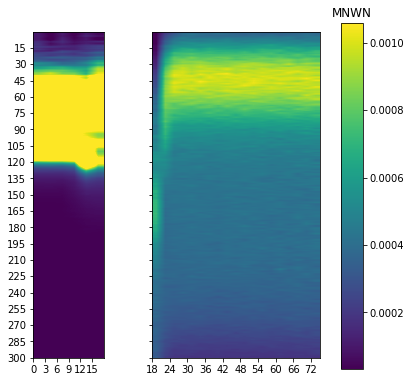

300


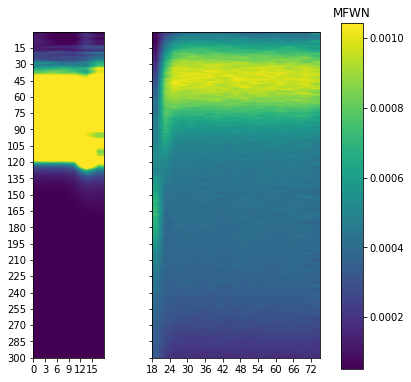

300


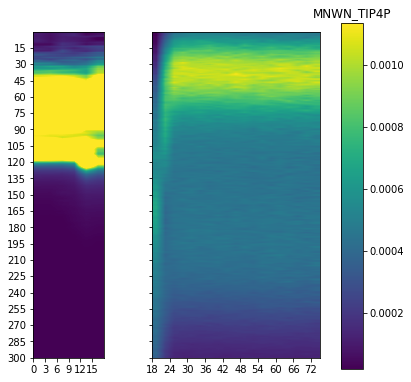

300


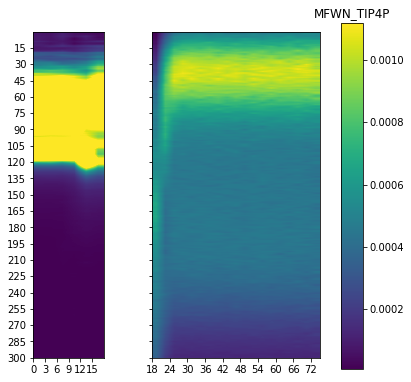

300


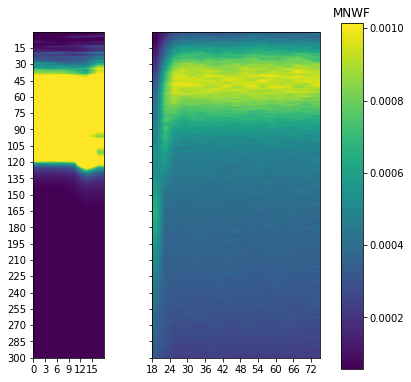

300


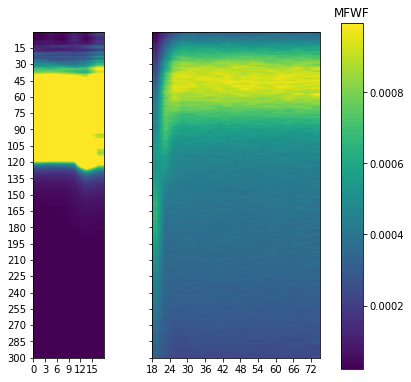

['MNWN', 'MFWN', 'MNWN_TIP4P', 'MFWN_TIP4P', 'MNWF', 'MFWF']

In [455]:
def getAllPlots(subsystem):
    fileOut = folder + "%s.eps"%(subsystem)
    system2 = "%s_Dynamics_TimeAdjusted_CM_Atomic"%(subsystem)
    system1 = "%s_Dynamics_TimeAdjusted_Au_Atomic"%(subsystem)
    n1=6
    n2=19
    freqThreshold = 300


    import matplotlib.pyplot as plt
    mat1, mat2 = HeatMapMatrix2(folder,system1,n1,system2,n2,freqThreshold)
    heatMap2(mat1,mat2,n1,n2,freqThreshold,fileOut)
    return subsystem
    

subsystemList=["MNWN","MFWN", "MNWN_TIP4P","MFWN_TIP4P","MNWF","MFWF"]
list(map(getAllPlots,subsystemList))

In [460]:
def getDifferencePlots(subsystem1, subsystem2,fileOutName,freqThreshold=300):
    print(freqThreshold)
    fileOut = folder + "%s.eps"%(fileOutName)
    n1=6
    n2=19
    import matplotlib.pyplot as plt
    
    system2 = "%s_Dynamics_TimeAdjusted_CM_Atomic"%(subsystem1)
    system1 = "%s_Dynamics_TimeAdjusted_Au_Atomic"%(subsystem1)
    
    mat11, mat21 = HeatMapMatrix2(folder,system1,n1,system2,n2,freqThreshold)
    
    system2 = "%s_Dynamics_TimeAdjusted_CM_Atomic"%(subsystem2)
    system1 = "%s_Dynamics_TimeAdjusted_Au_Atomic"%(subsystem2)
    
    mat12, mat22 = HeatMapMatrix2(folder,system1,n1,system2,n2,freqThreshold)
    
    diff1 = mat12 - mat11
    diff2 = mat22 - mat21
    
    heatMap2(diff1,diff2,n1,n2,freqThreshold,fileOut)
    return subsystem1, subsystem2

200
200


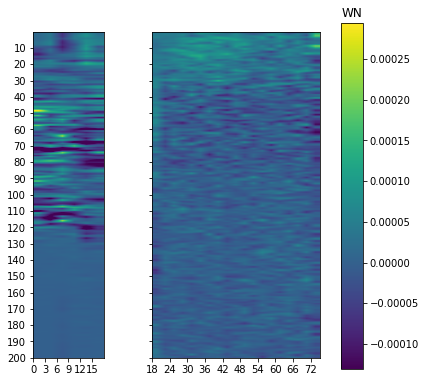

200
200


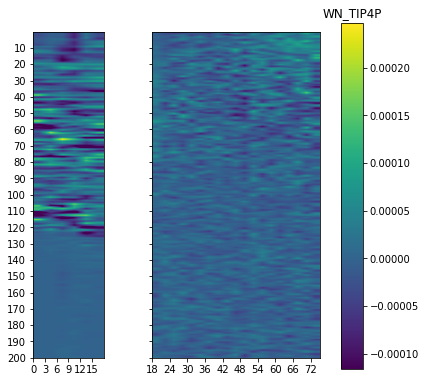

200
200


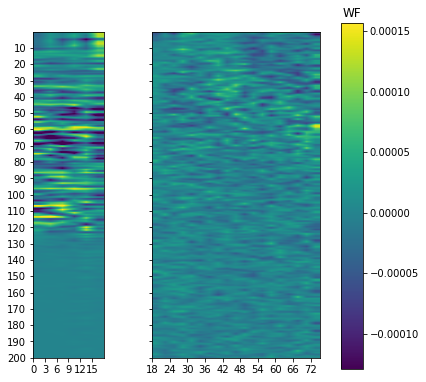

[('MNWN', 'MFWN'), ('MNWN_TIP4P', 'MFWN_TIP4P'), ('MNWF', 'MFWF')]

In [461]:


subsystem1 = ["MNWN", "MNWN_TIP4P", "MNWF"]
subsystem2 = ["MFWN", "MFWN_TIP4P" , "MFWF"]
fileOutName = ["WN","WN_TIP4P", "WF"]
freqThreshold = [200,200,200]

list(map(getDifferencePlots, subsystem1, subsystem2,fileOutName, freqThreshold))


300
300


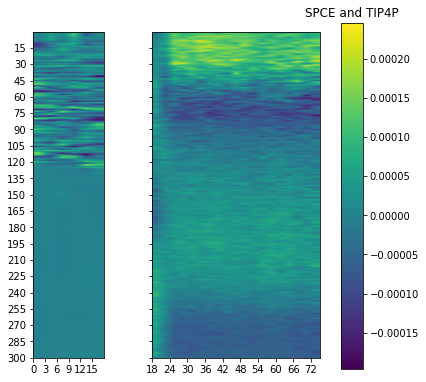

300
300


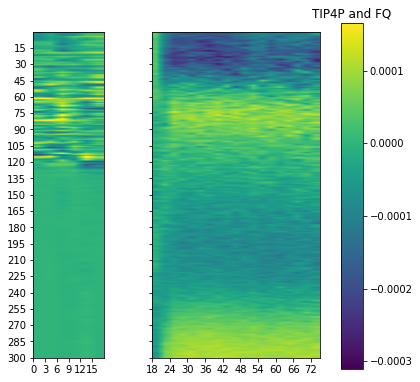

300
300


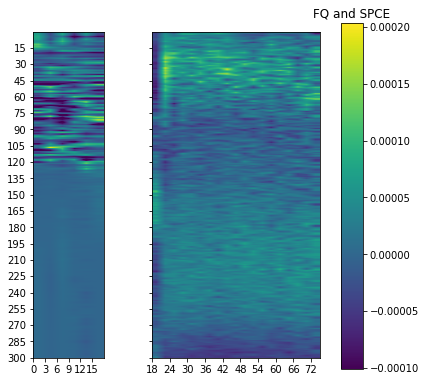

[('MNWN', 'MNWN_TIP4P'), ('MNWN_TIP4P', 'MNWF'), ('MNWF', 'MNWN')]

In [462]:
subsystem1 = ["MNWN", "MNWN_TIP4P", "MNWF"]
subsystem2 = ["MNWN_TIP4P", "MNWF" , "MNWN"]
fileOutName = ["SPCE and TIP4P","TIP4P and FQ", "FQ and SPCE"]
freqThreshold = [300,300,300]

list(map(getDifferencePlots, subsystem1, subsystem2,fileOutName, freqThreshold))

300
300


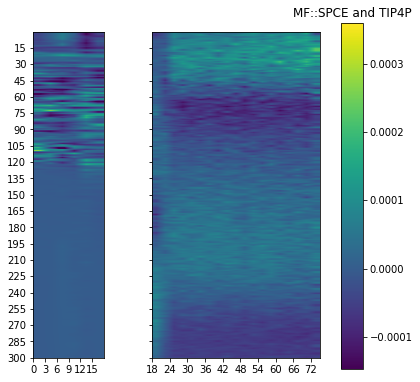

300
300


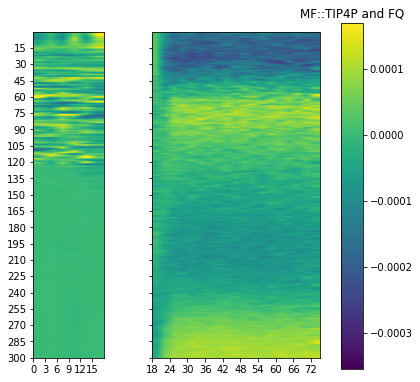

300
300


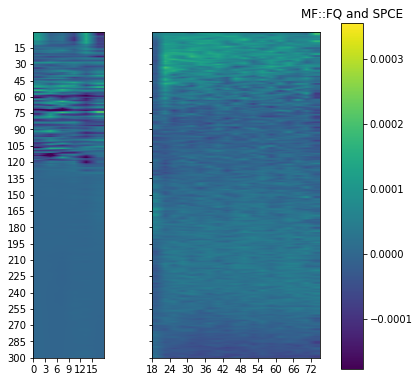

[('MFWN', 'MFWN_TIP4P'), ('MFWN_TIP4P', 'MFWF'), ('MFWF', 'MFWN')]

In [463]:
subsystem1 = ["MFWN", "MFWN_TIP4P", "MFWF"]
subsystem2 = ["MFWN_TIP4P", "MFWF" , "MFWN"]
fileOutName = ["MF::SPCE and TIP4P","MF::TIP4P and FQ", "MF::FQ and SPCE"]
freqThreshold = [300,300,300]

list(map(getDifferencePlots, subsystem1, subsystem2,fileOutName, freqThreshold))

In [139]:
sum((mat/sum(mat)))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

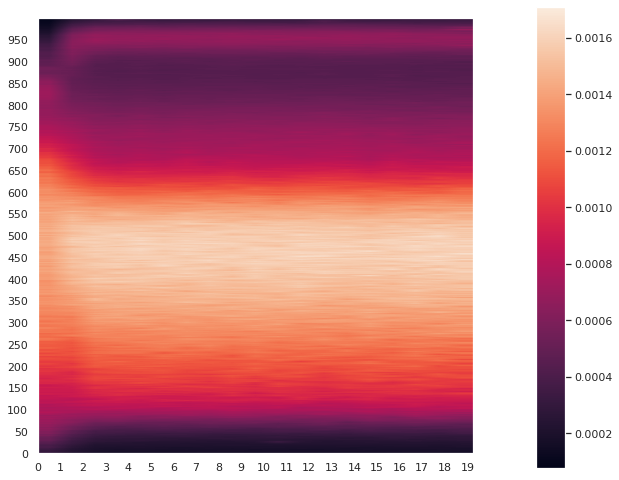

In [154]:
heatMap(mat)